In [43]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

### Collect results

In [44]:
# A list that has the names of all cases.
cases_folder_names = ['\\case01', '\\case02', '\\case03', '\\case04', '\\case05', '\\case06', '\\case07', '\\case08', 
                      '\\case09', '\\case10', '\\case11', '\\case12', '\\case13', '\\case14', '\\case15', '\\case16',
                      '\\case17', '\\case18', '\\case19', '\\case20', '\\case21', '\\case22', '\\case23']

best_model_directory = r"C:\Nikolaos Sintoris\Education\MEng CSE - UOI\Diploma Thesis\Training Results\Layer 1\Best Model"
model_names = ['\\ResNet50 Classifier', '\\ResNet50 MoCo', '\\ResNet50 SimCLR']
classifier_results = []
moco_results = []
simCLR_results = []

for current_model_name in model_names:
    current_best_model_directory = best_model_directory + current_model_name

    test_accuracy_list = []
    test_f1_score_list = []
    for current_case_name in cases_folder_names:
        current_case_best_model_directory = current_best_model_directory + current_case_name

        # Load accuracy and F1-Score.
        accuracy_f1_score_np_loaded = np.loadtxt(current_case_best_model_directory + "\\accuracy_f1_score.csv", delimiter = ',')
        test_accuracy_list.append(accuracy_f1_score_np_loaded[0])
        test_f1_score_list.append(accuracy_f1_score_np_loaded[1])

        if(current_model_name == model_names[0]):
            classifier_results.append(test_accuracy_list)
            classifier_results.append(test_f1_score_list)
        elif(current_model_name == model_names[1]):
            moco_results.append(test_accuracy_list)
            moco_results.append(test_f1_score_list)
        else:
            simCLR_results.append(test_accuracy_list)
            simCLR_results.append(test_f1_score_list)
          

### Compare Methods

In [45]:
case_names = ['case01', 'case02', 'case03', 'case04', 'case05', 'case06', 'case07', 'case08', 'case09', 'case10', 
              'case11', 'case12', 'case13', 'case14', 'case15', 'case16', 'case17', 'case18', 'case19', 'case20', 
              'case21', 'case22', 'case23']

bar_charts_images_directory = r"C:\Nikolaos Sintoris\Education\MEng CSE - UOI\Diploma Thesis\Training Results\Bar charts images"

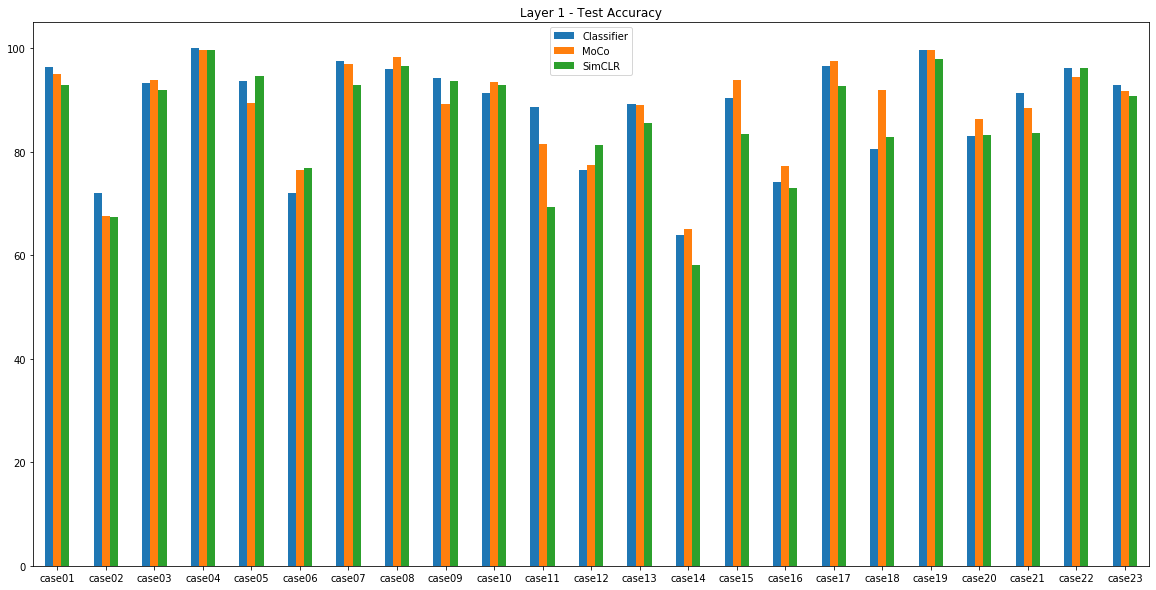

In [46]:
test_accuracy_df = pd.DataFrame({'Classifier': classifier_results[0], 'MoCo': moco_results[0], 'SimCLR': simCLR_results[0]}, 
                  index = case_names)

test_accuracy_ax = test_accuracy_df.plot.bar(rot = 0, title = "Layer 1 - Test Accuracy", figsize = (20, 10))

#plt.savefig(bar_charts_images_directory + "\\Layer 4 - Test Accuracy.jpg")

In [47]:
mean_accuracy_classifier = (sum(classifier_results[0])) / (len(classifier_results[0]))
mean_accuracy_moco = (sum(moco_results[0])) / (len(moco_results[0]))
mean_accuracy_simclr = (sum(simCLR_results[0])) / (len(simCLR_results[0]))

mean_accuracy_values = [mean_accuracy_classifier, mean_accuracy_moco, mean_accuracy_simclr]
minimum_accuracy_values = [min(classifier_results[0]), min(moco_results[0]), min(simCLR_results[0])]
maximum_accuracy_values = [max(classifier_results[0]), max(moco_results[0]), max(simCLR_results[0])]

mean_accuracy_df = pd.DataFrame(np.array([mean_accuracy_values, minimum_accuracy_values, maximum_accuracy_values]),
                                columns = ["Classifier", "MoCo", "SimCLR"],
                                index = ["Mean Accuracy", "Minimum", "Maximum"])

mean_accuracy_df

,Classifier,MoCo,SimCLR
Mean Accuracy,88.231457,88.425974,85.977926
Minimum,63.902439,65.121951,58.048780
Maximum,100.000000,99.671593,99.671593


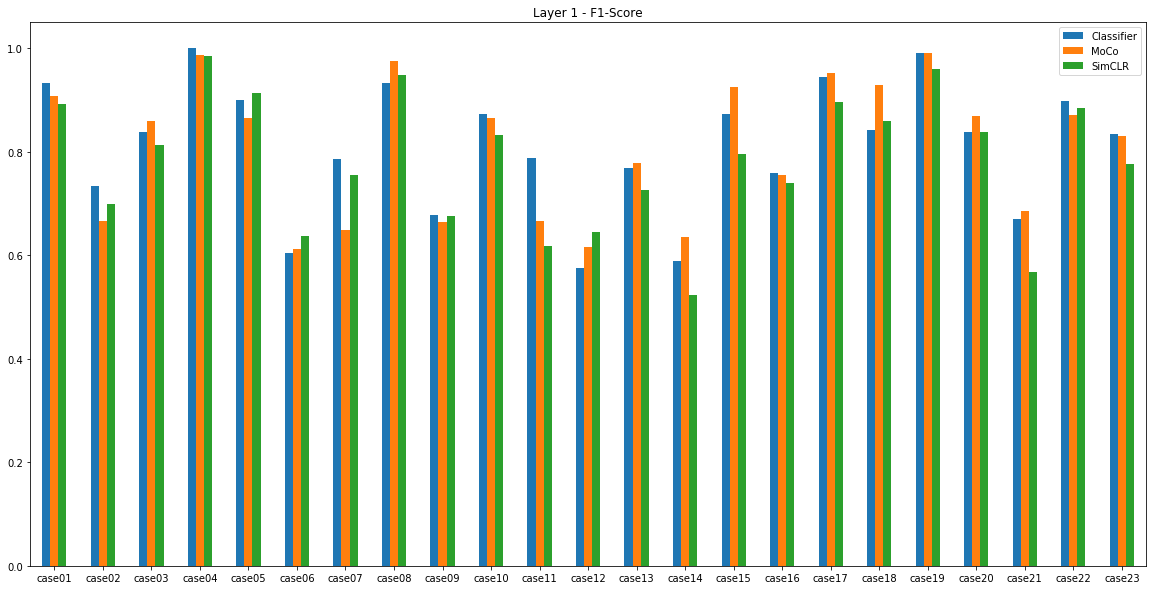

In [48]:
test_f1_score_df = pd.DataFrame({'Classifier': classifier_results[1], 'MoCo': moco_results[1], 'SimCLR': simCLR_results[1]}, 
                  index = case_names)

test_f1_score_ax = test_f1_score_df.plot.bar(rot = 0, title = "Layer 1 - F1-Score", figsize = (20, 10))

#plt.savefig(bar_charts_images_directory + "\\Layer 4 - F1-Score.jpg")

In [49]:
mean_f1_classifier = (sum(classifier_results[1])) / (len(classifier_results[1]))
mean_f1_moco = (sum(moco_results[1])) / (len(moco_results[1]))
mean_f1_simclr = (sum(simCLR_results[1])) / (len(simCLR_results[1]))

mean_f1_values = [mean_f1_classifier, mean_f1_moco, mean_f1_simclr]
minimum_f1_values = [min(classifier_results[1]), min(moco_results[1]), min(simCLR_results[1])]
maximum_f1_values = [max(classifier_results[1]), max(moco_results[1]), max(simCLR_results[1])]

mean_f1_df = pd.DataFrame(np.array([mean_f1_values, minimum_f1_values, maximum_f1_values]),
                                columns = ["Classifier", "MoCo", "SimCLR"],
                                index = ["Mean F1-Score", "Minimum", "Maximum"])

mean_f1_df

,Classifier,MoCo,SimCLR
Mean F1-Score,0.810739,0.806393,0.781776
Minimum,0.575957,0.612738,0.523358
Maximum,1.000000,0.991095,0.985508
